In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

C:\Users\chino\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train=pd.read_csv("mertrain.csv")
test=pd.read_csv("mertest.csv")

In [3]:
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values) + list(test[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))
print('Shape train: {}\nShape test: {}'.format(train.shape, test.shape))

Shape train: (4209, 378)
Shape test: (4209, 377)


In [4]:
y = train['y'].values
y_mean = np.mean(y)
id_test = test['ID'].values
X = train.drop(['y'], axis=1).values
X_test= test.values

In [5]:
num_columns=X.shape[1]
num_columns

377

In [6]:
vifs=[variance_inflation_factor(X, i) for i in range(0, num_columns)]

C:\Users\chino\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\chino\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [40]:
vifs

[2.3074530554960839,
 2.643645753219992,
 6.4549326579928534,
 20.228607350462507,
 2.9416805326224877,
 1.0321704095108812,
 1.9410476263756229,
 1.2726317582836324,
 1.2043409684446289,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 4.2069155652723582,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 1.3428282782253744,
 inf,
 inf,
 inf,
 1.0912150469497259,
 21.329526164115329,
 inf,
 38.452344237716012,
 2.414748329261776,
 4.1565770193533709,
 inf,
 304.50628242879372,
 3.4890926208658319,
 2.7336174438320828,
 inf,
 inf,
 inf,
 2.7106100017656698,
 2.1695408386412871,
 14.862041358119908,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 2.6213122692421971,
 10.167906075511393,
 inf,
 inf,
 3.6221638898028945,
 4.3411590188223306,
 3.863416842199733,
 inf,
 1.3505195632219835,
 inf,
 4.4903787064318514,
 inf,
 inf,
 4.4669356700665084,
 1.49279477509736,
 inf,
 4.0510014241368886,
 2.0301605744649236,
 inf,
 inf,
 39.73066545297391

In [8]:
from pandas import DataFrame

In [9]:
vif_df=DataFrame(vifs, index=train.drop(['y'], axis=1).columns, columns=['VIF'])

In [10]:
vif_df=vif_df.replace([np.inf, -np.inf], np.nan).dropna(how='all')

In [11]:
vif_df=vif_df.sort_values(ascending=False, by='VIF')

In [12]:
vif_df.index

Index(['X178', 'X362', 'X331', 'X49', 'X238', 'X129', 'X352', 'X179', 'X215',
       'X161',
       ...
       'X8', 'X270', 'X291', 'X319', 'X104', 'X288', 'X42', 'X190', 'X332',
       'X4'],
      dtype='object', length=122)

In [21]:
vif_df.head()

,VIF
X178,1139.903769
X362,697.916906
X331,308.303315
X49,304.506282
X238,303.421330


In [25]:
best_vif=[]
for i in list(vif_df.values):
    if i >= 10:
        best_vif.append(i)

In [26]:
len(best_vif)

37

TypeError: only length-1 arrays can be converted to Python scalars

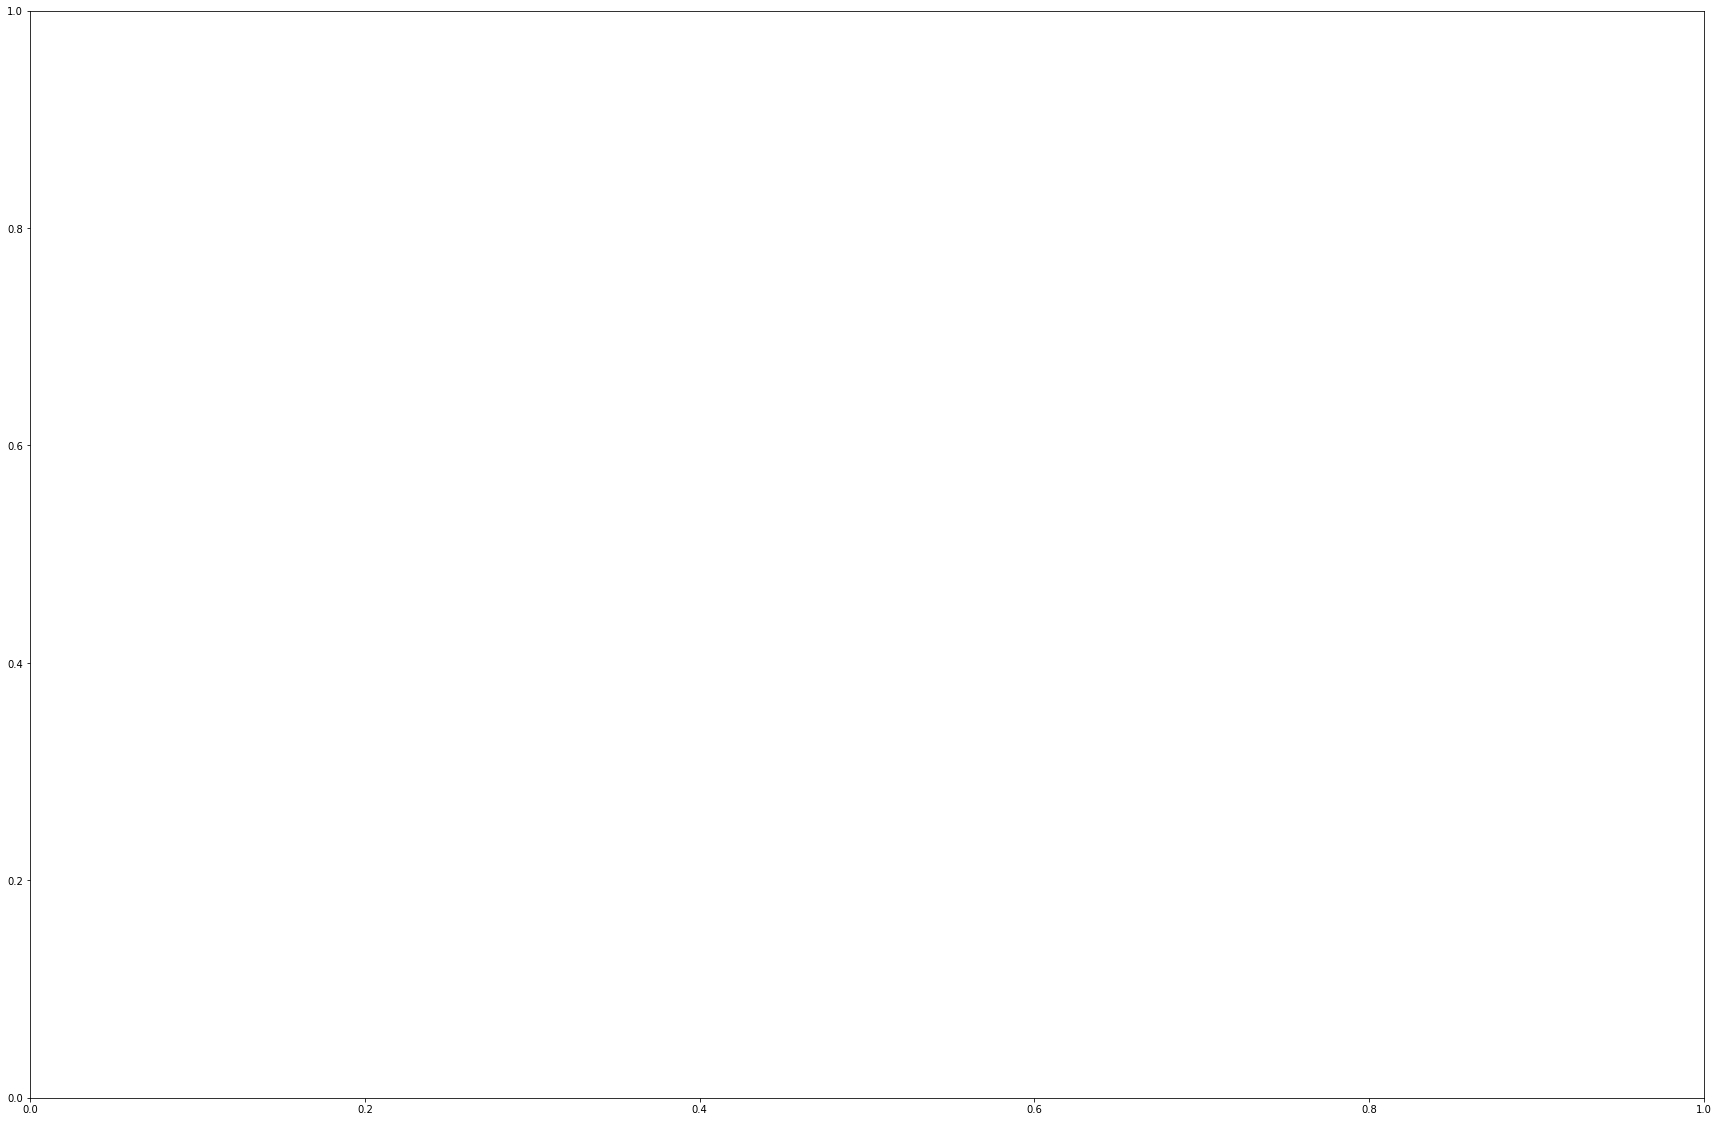

In [39]:
ig = plt.figure(figsize=(30,20))
vif_val=np.array(best_vif)
index=np.arange(len(best_vif))
sig_vals=np.array(vif_df.index)
bar_width=0.35
plt.bar(index, vif_val,color='b' )
plt.title('VIF')
plt.xlabel('Index')
plt.ylabel('VIF')
plt.xticks(index + bar_width / 2, sig_vals)
plt.show()